In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [15]:
img = image.load_img(r"C:\Users\Srinath\Eye\dataset\train\open/1740.jpg")

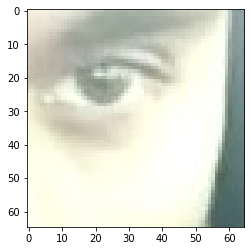

In [16]:
plt.imshow(img)

In [17]:
cv2.imread(r"C:\Users\Srinath\Eye\dataset\train\open/1740.jpg").shape

(65, 65, 3)

In [18]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset=train.flow_from_directory(r"C:\Users\Srinath\Eye\dataset\train/",
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="binary")


validation_dataset=train.flow_from_directory(r"C:\Users\Srinath\Eye\dataset\validation/",
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="binary")

Found 1013 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'close': 0, 'open': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(16, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [46]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),activation="relu",input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(5,5),
                                  
                                  #
                                  tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(5,5),
                                  
                                  #
                                    
                                  
                                  #
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  ##
                                  tf.keras.layers.Dense(16,activation="relu"),
                                  ##
                                  tf.keras.layers.Dense(1,activation="sigmoid"),
                                  
                                 ])

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 44, 44, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 42, 42, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                16400     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model_fit = model.fit(train_dataset,
                    steps_per_epoch=10,
                    epochs=30,
                    validation_data=validation_dataset)


#model.fit(train_dataset, epochs=30, validation_data=validation_dataset, shuffle=True)

Epoch 1/30
10/10 [==============================] - 3s 261ms/step - loss: 0.6578 - accuracy: 0.5500 - val_loss: 0.7549 - val_accuracy: 0.3571
Epoch 2/30
10/10 [==============================] - 2s 210ms/step - loss: 0.6443 - accuracy: 0.5094 - val_loss: 0.7257 - val_accuracy: 0.3571
Epoch 3/30
10/10 [==============================] - 2s 205ms/step - loss: 0.6026 - accuracy: 0.5531 - val_loss: 0.6574 - val_accuracy: 0.6667
Epoch 4/30
10/10 [==============================] - 2s 207ms/step - loss: 0.5450 - accuracy: 0.6537 - val_loss: 0.6152 - val_accuracy: 0.6190
Epoch 5/30
10/10 [==============================] - 2s 209ms/step - loss: 0.5022 - accuracy: 0.7781 - val_loss: 0.6136 - val_accuracy: 0.6905
Epoch 6/30
10/10 [==============================] - 2s 209ms/step - loss: 0.4412 - accuracy: 0.8500 - val_loss: 0.5612 - val_accuracy: 0.7381
Epoch 7/30
10/10 [==============================] - 2s 226ms/step - loss: 0.4307 - accuracy: 0.8091 - val_loss: 0.6555 - val_accuracy: 0.6905
Epoch 

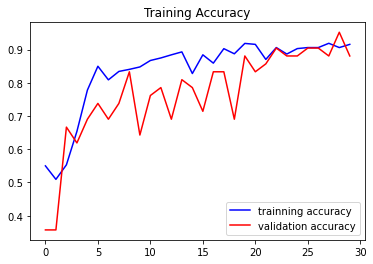

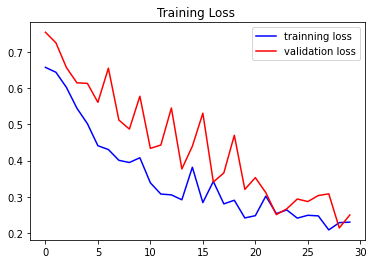

<Figure size 432x288 with 0 Axes>

In [51]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(len(accuracy))



plt.title("Training Accuracy")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy.jpg")


plt.title("Training Loss ")
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
plt.savefig("Loss.jpg")




In [157]:
model.save("transfer_model/cnn_mobile.h5")

In [158]:
model.save("transfer_model/cnn_mobile.model")

INFO:tensorflow:Assets written to: transfer_model/cnn_mobile.model\assets


In [169]:
validation_dataset.class_indices

{'close': 0, 'open': 1}

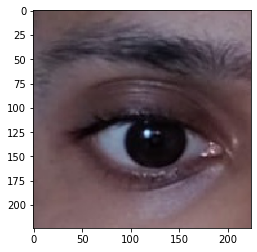

opened


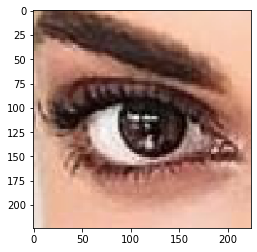

opened


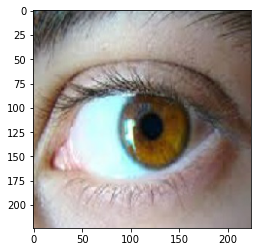

opened


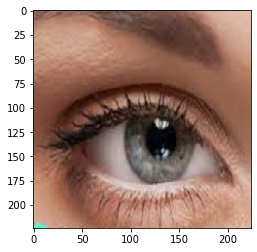

opened


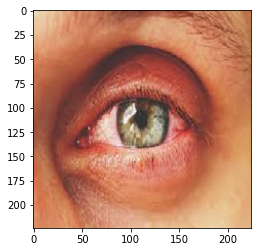

opened


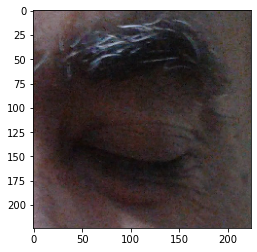

closed


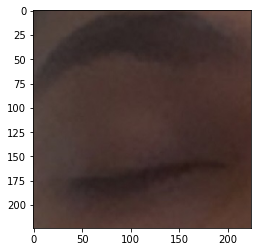

closed


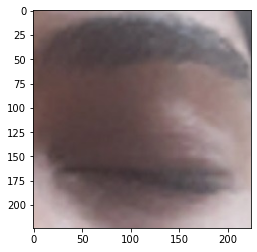

closed


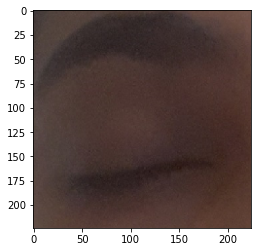

closed


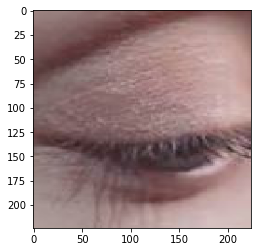

closed


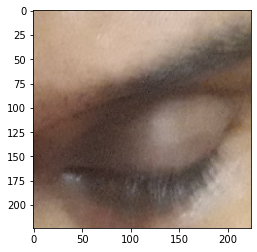

closed


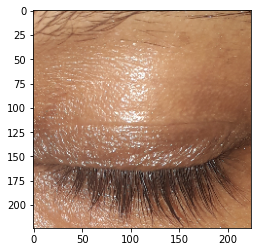

closed


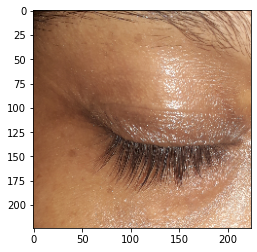

closed


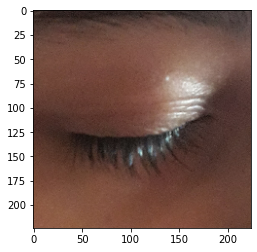

closed


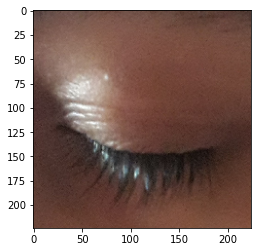

closed


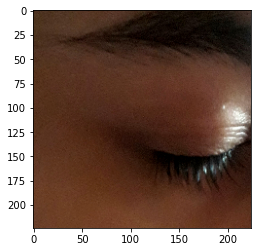

closed


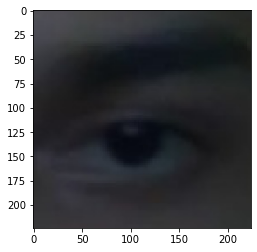

opened


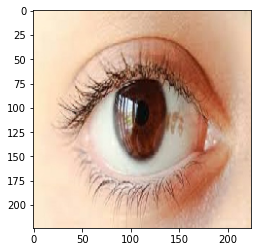

opened


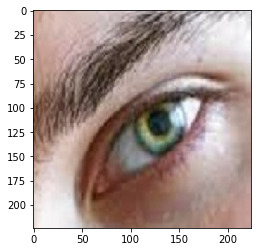

opened


In [170]:
data_path=r"C:\Users\Srinath\Eye\dataset\validate"
for i in os.listdir(data_path):
    
    img=image.load_img(data_path+'/'+i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if(val==0):
        print("closed")
    else:
        print("opened")
        